In [ ]:
pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd 
df=pd.read_csv("/content/drive/MyDrive/Projects 2023/Anomaly/data.csv")

In [ ]:
tc=df['Target'].value_counts()

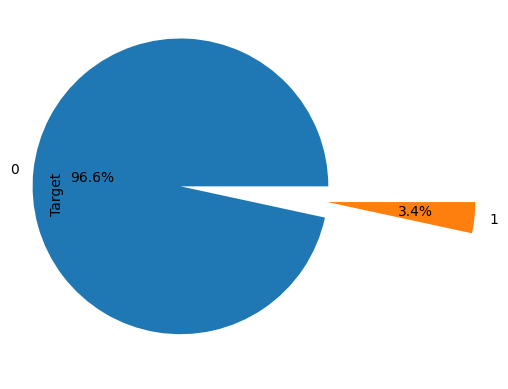

In [ ]:
yy67yyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyy

In [ ]:
df['td']=df['Process temperature [K]']-df['Air temperature [K]']

In [ ]:
df["Process_temp_normalized"]=(df["Process temperature [K]"]-min(df['Air temperature [K]']))/(max(df['Process temperature [K]'])-min(df['Air temperature [K]']))
df["Air_temp_normalized"]=(df["Air temperature [K]"]-min(df['Air temperature [K]']))/(max(df['Process temperature [K]'])-min(df['Air temperature [K]']))

In [ ]:
df['Temp_diff']=df['Process_temp_normalized']=df['Air_temp_normalized']


In [ ]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,td,Process_temp_normalized,Air_temp_normalized,Temp_diff
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure,10.5,0.151351,0.151351,0.151351
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure,10.5,0.156757,0.156757,0.156757
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure,10.4,0.151351,0.151351,0.151351
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure,10.4,0.156757,0.156757,0.156757
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure,10.5,0.156757,0.156757,0.156757


In [ ]:
df_pass=df[df['Target']==0]
df_pass=df_pass[df_pass['Failure Type']=='No Failure']
df_fail=df[df['Target']==1]
df_fail=df_fail[df_fail['Failure Type']!='No Failure']

df1=df[df['Failure Type']=='Heat Dissipation Failure']
df2=df[df['Failure Type']=='Power Failure']
df3=df[df['Failure Type']=='Overstrain Failure']
df4=df[df['Failure Type']=='Tool Wear Failure']
df5=df[df['Failure Type']=='Random Failures ']

The distribution of temperature difference for all non failures¶


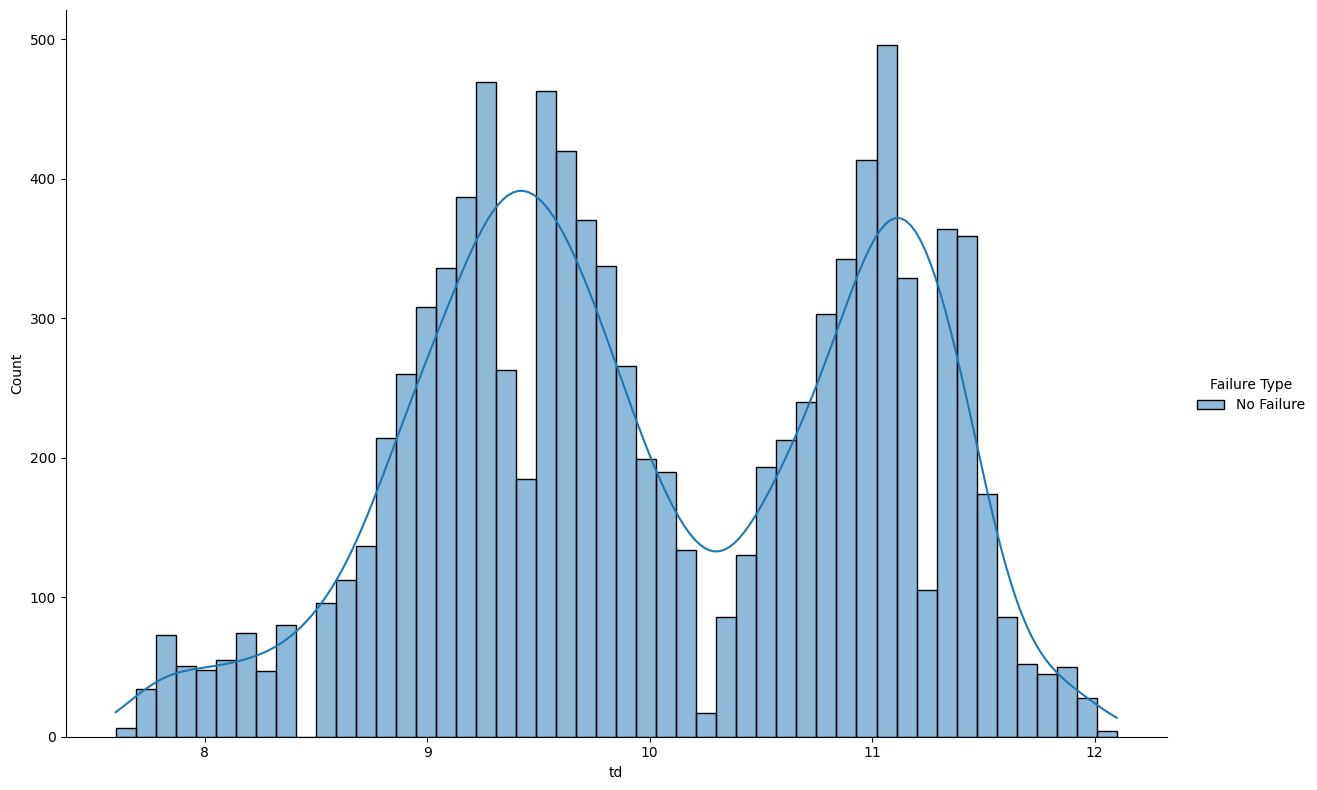

In [ ]:
sns.displot(data=df_pass, x="td",hue="Failure Type", kde=True, bins = 50,height = 8, aspect =1.5)


Distribution of temperature difference and respective failure types when failure occus is as follows

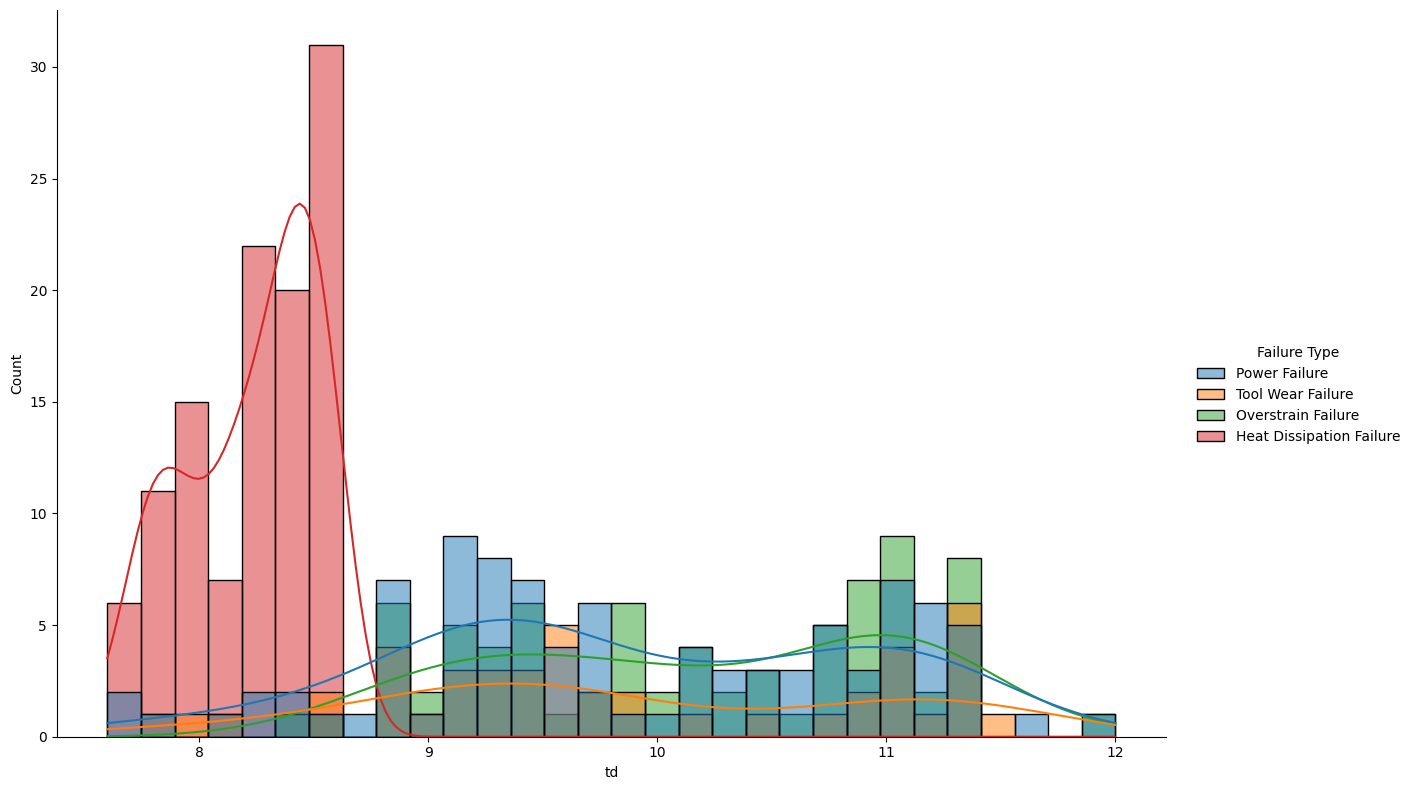

In [ ]:
sns.displot(data=df_fail, x="td",hue="Failure Type", kde=True, bins = 30,height = 8, aspect =1.5)


The distribution of air temperature when failures occur

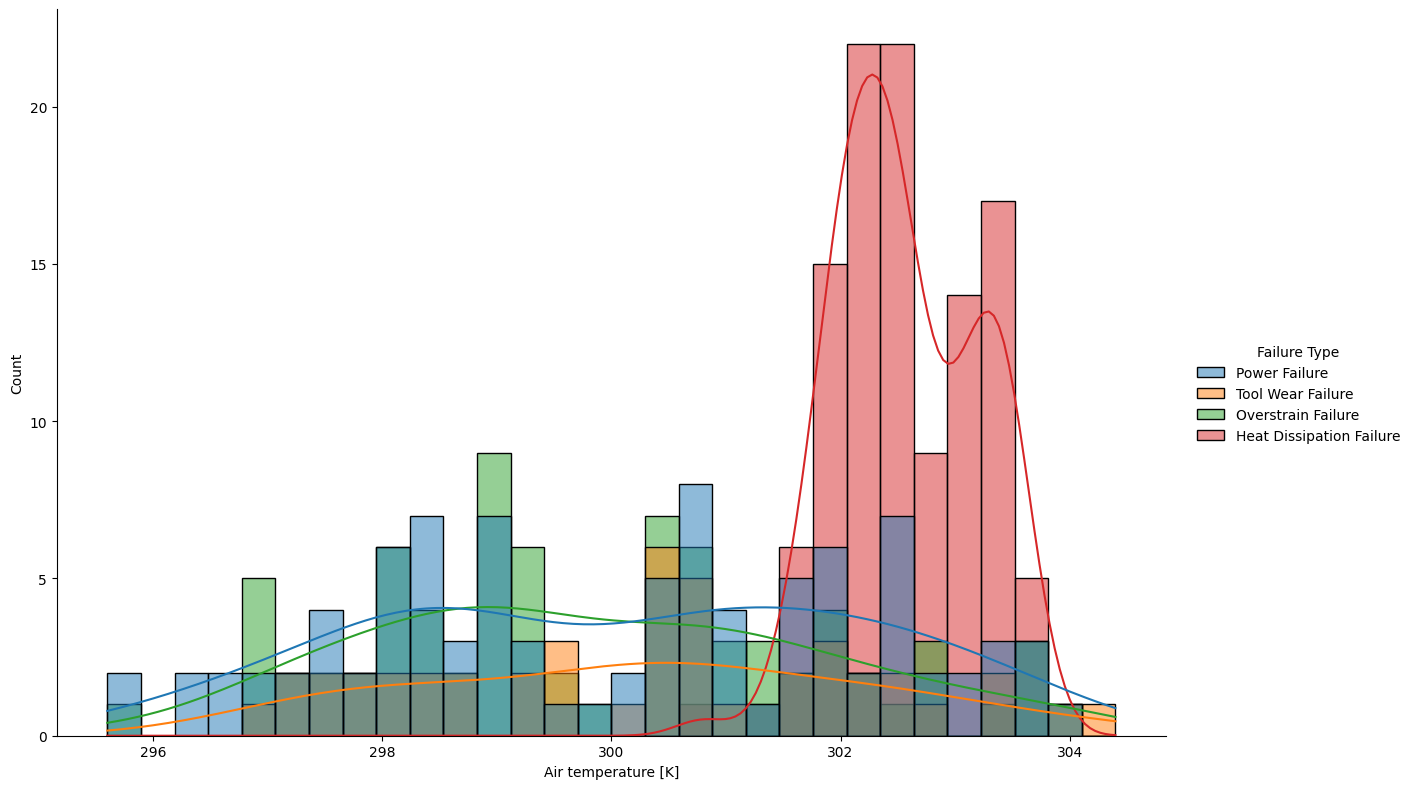

In [ ]:
sns.displot(data=df_fail, x="Air temperature [K]",hue="Failure Type", kde=True, bins = 30,height = 8, aspect =1.5)

The distribution of air temperature when failures occur


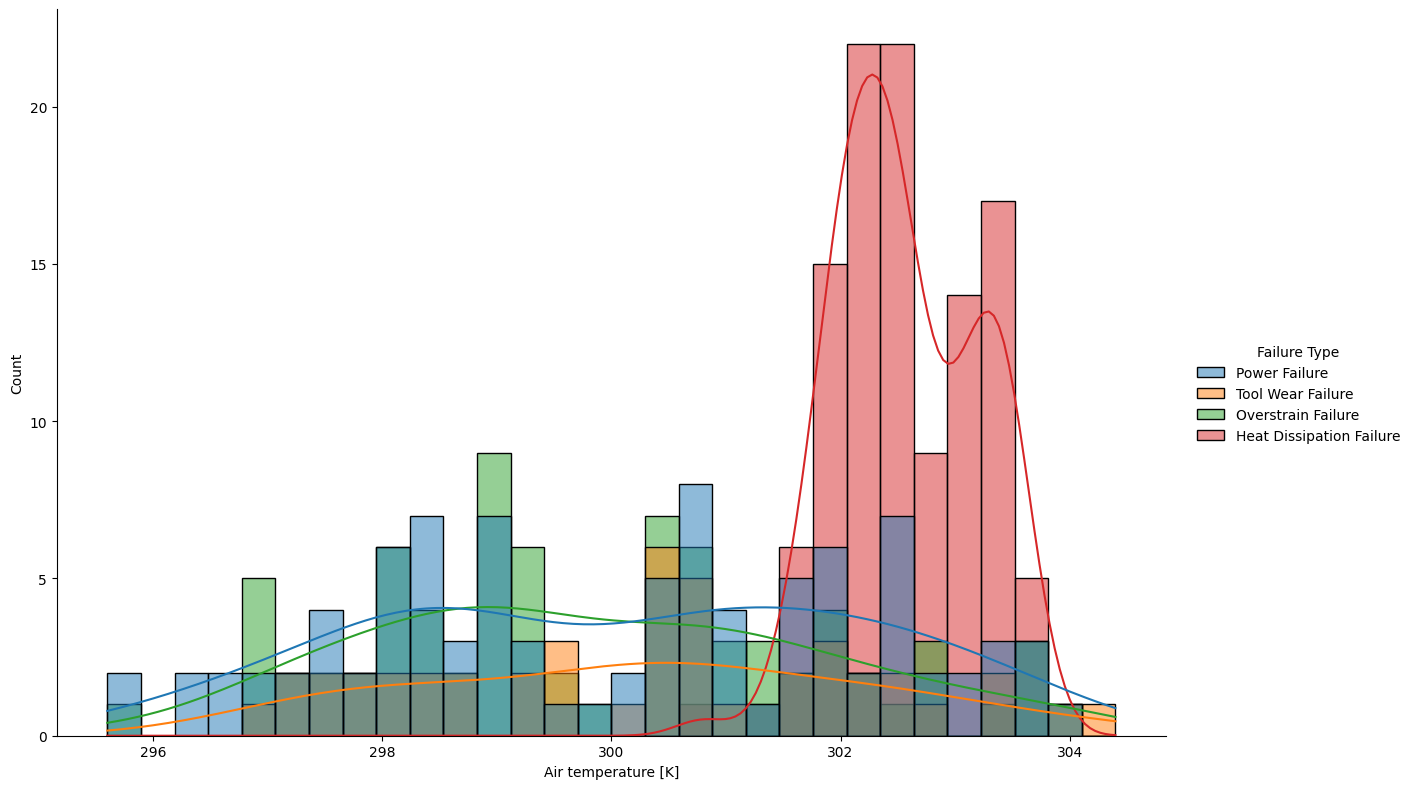

In [ ]:
sns.displot(data=df_fail, x="Air temperature [K]",hue="Failure Type", kde=True, bins = 30,height = 8, aspect =1.5)

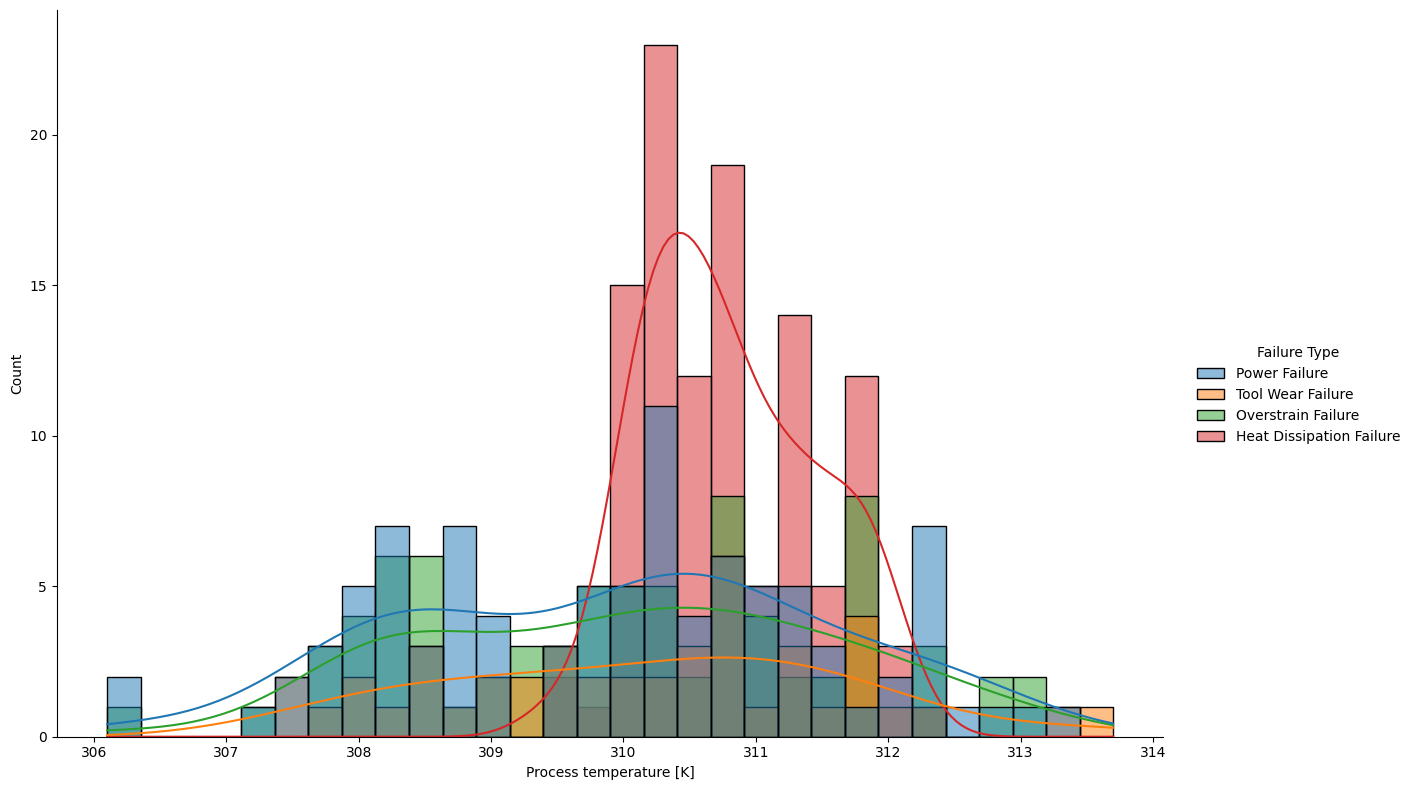

In [ ]:
sns.displot(data=df_fail, x="Process temperature [K]",hue="Failure Type", kde=True, bins = 30,height = 8, aspect =1.5)

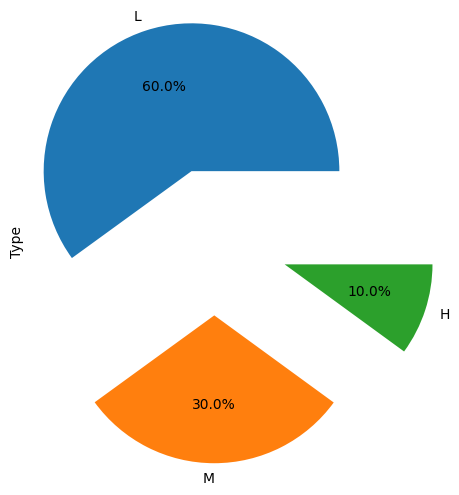

In [ ]:
x=df['Type'].value_counts().plot.pie(explode=[0.5, 0.5,0.5],autopct='%1.1f%%')

Pie chart of total machines that do not fail


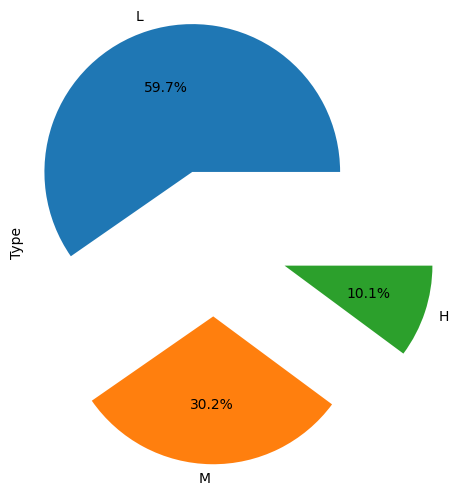

In [ ]:
x=df_pass['Type'].value_counts().plot.pie(explode=[0.5, 0.5,0.5],autopct='%1.1f%%')

Pie chart of machines that failed


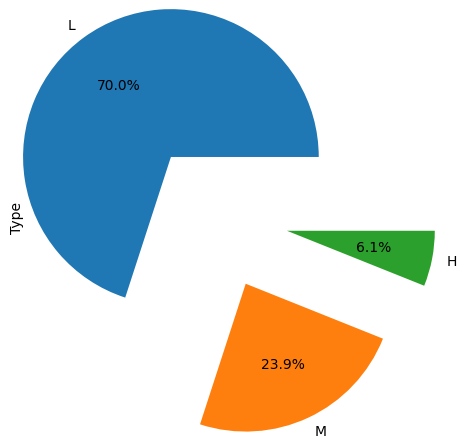

In [ ]:
x=df_fail['Type'].value_counts().plot.pie(explode=[0.5, 0.5,0.5],autopct='%1.1f%%')

The distribution of RPM on failed data is shown below

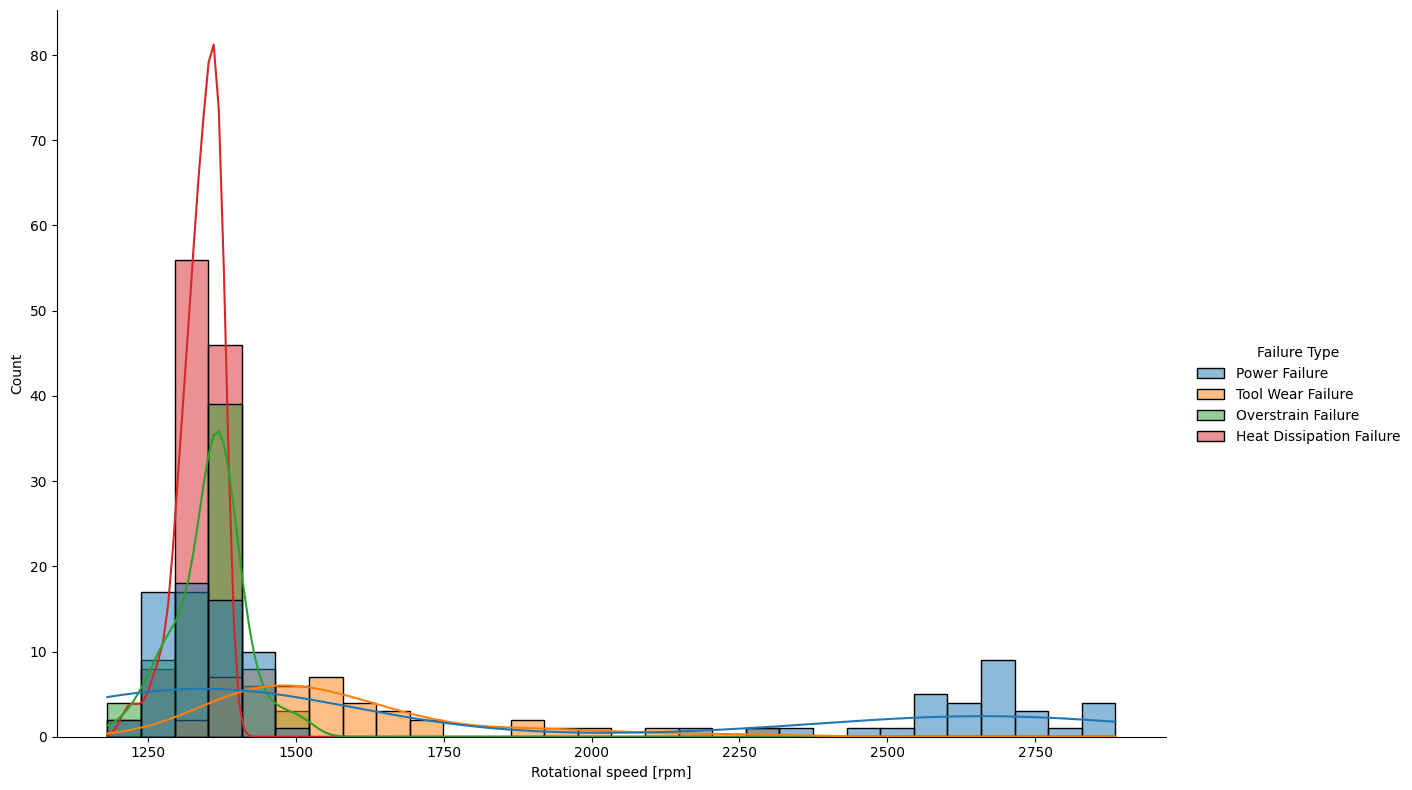

In [ ]:
sns.displot(data=df_fail, x="Rotational speed [rpm]",hue="Failure Type", kde=True, bins = 30,height = 8, aspect =1.5)

The distribution of RPM when failure occue is as follows

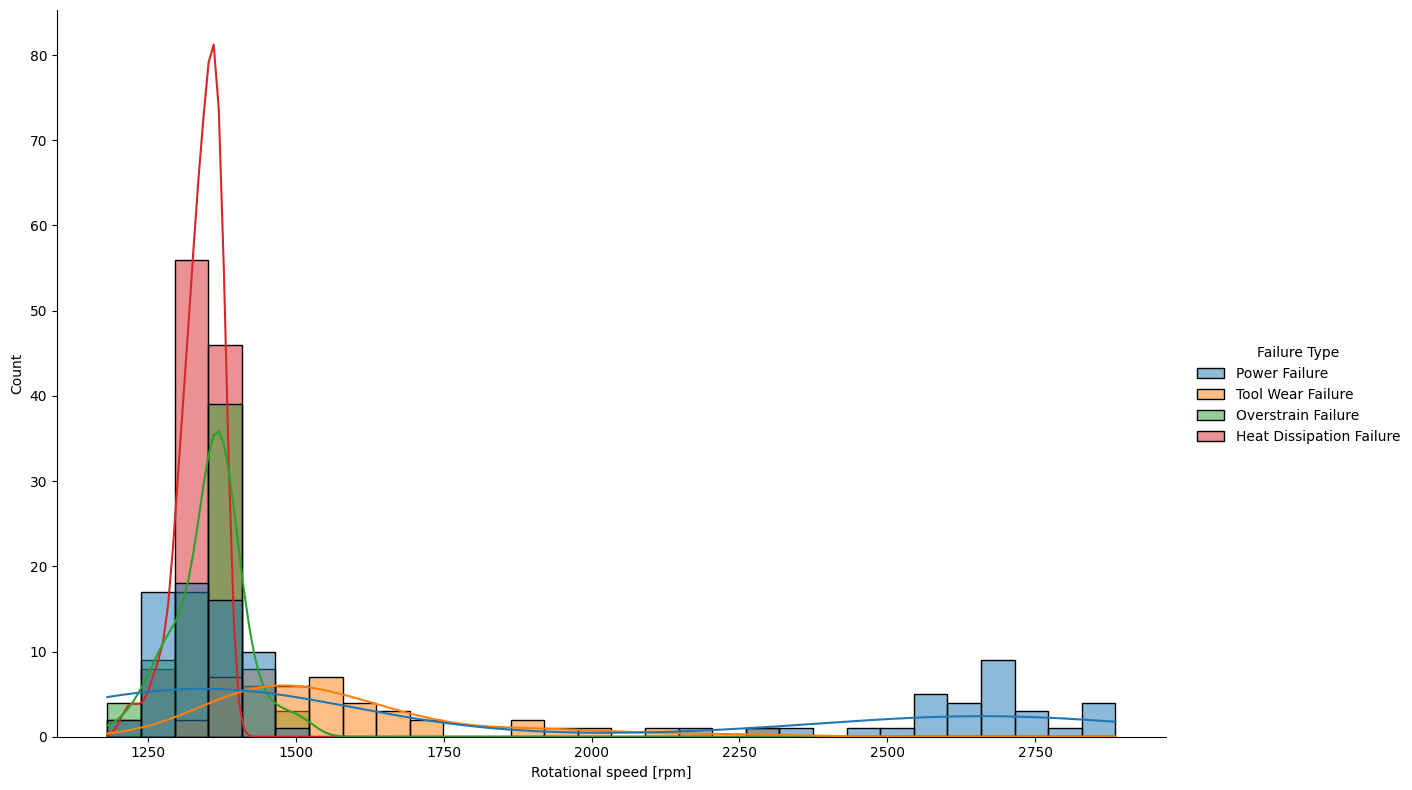

In [ ]:
sns.displot(data=df_fail, x="Rotational speed [rpm]",hue="Failure Type", kde=True, bins = 30,height = 8, aspect =1.5)

Lets see the plot of RPM and torque

<Axes: xlabel='Rotational speed [rpm]', ylabel='Torque [Nm]'>

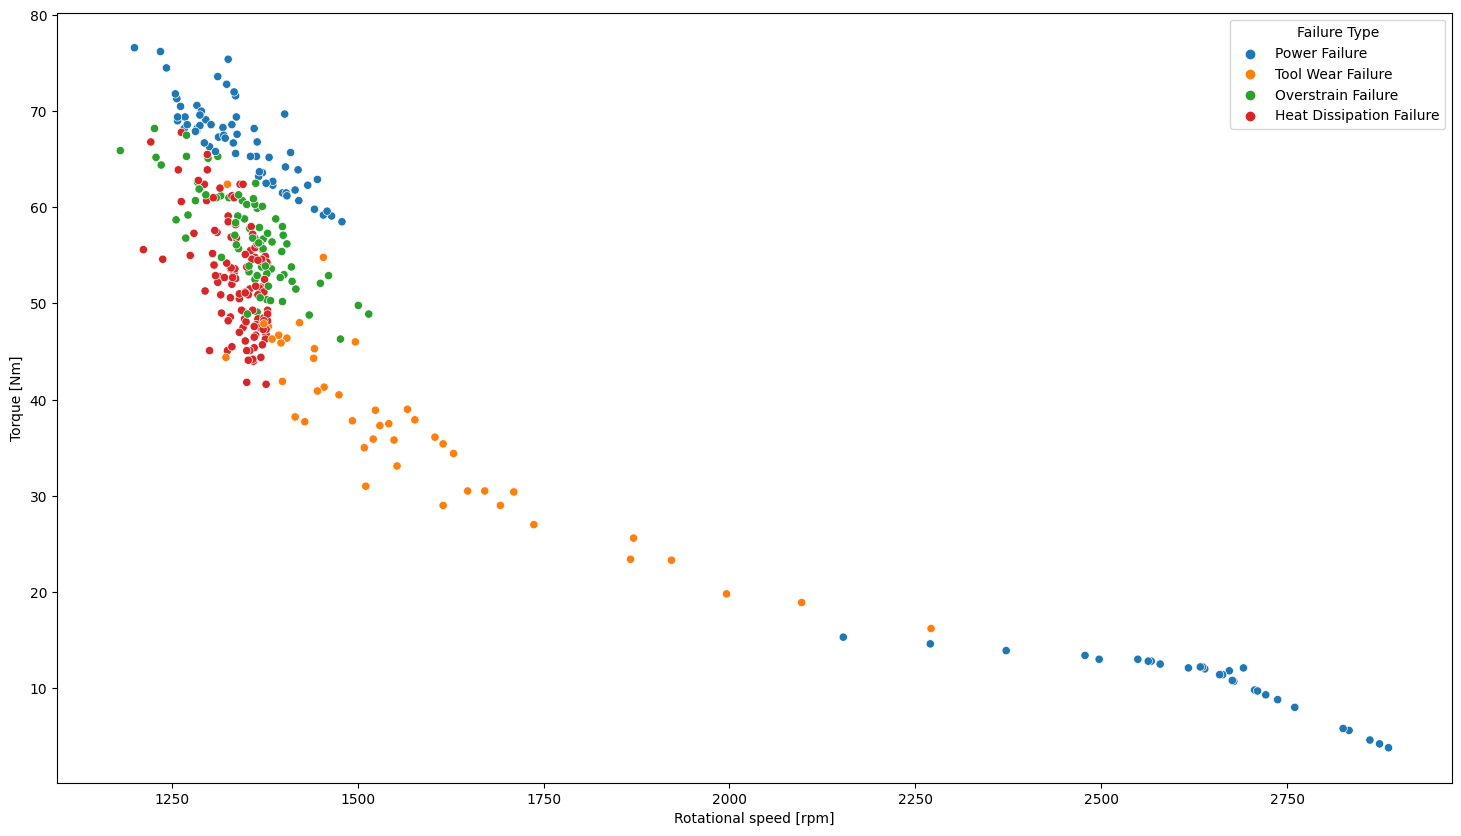

In [ ]:
plt.figure(figsize=(18,10))
sns.scatterplot(data=df_fail,x="Rotational speed [rpm]",y='Torque [Nm]',hue="Failure Type")

In [ ]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type', 'td',
       'Process_temp_normalized', 'Air_temp_normalized', 'Temp_diff'],
      dtype='object')

The distribution of tool wear is as follows

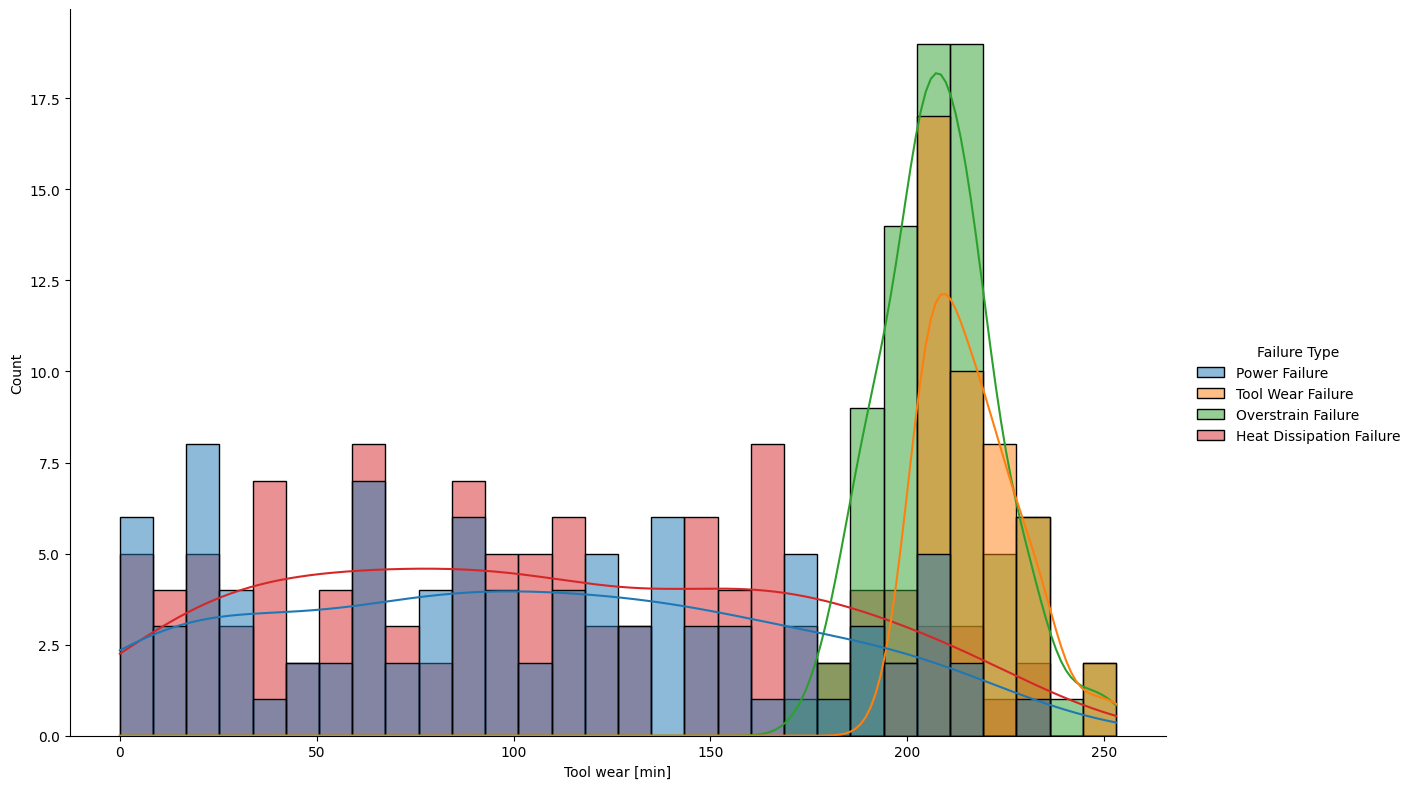

In [ ]:
sns.displot(data=df_fail, x="Tool wear [min]",hue="Failure Type", kde=True, bins = 30,height = 8, aspect =1.5)

It is clearly evident that failures like Overstrain failure and tool wear failure are very dependent on tool wear¶


The plot of rpm wrt tool wear is as follows

<Axes: xlabel='Tool wear [min]', ylabel='Rotational speed [rpm]'>

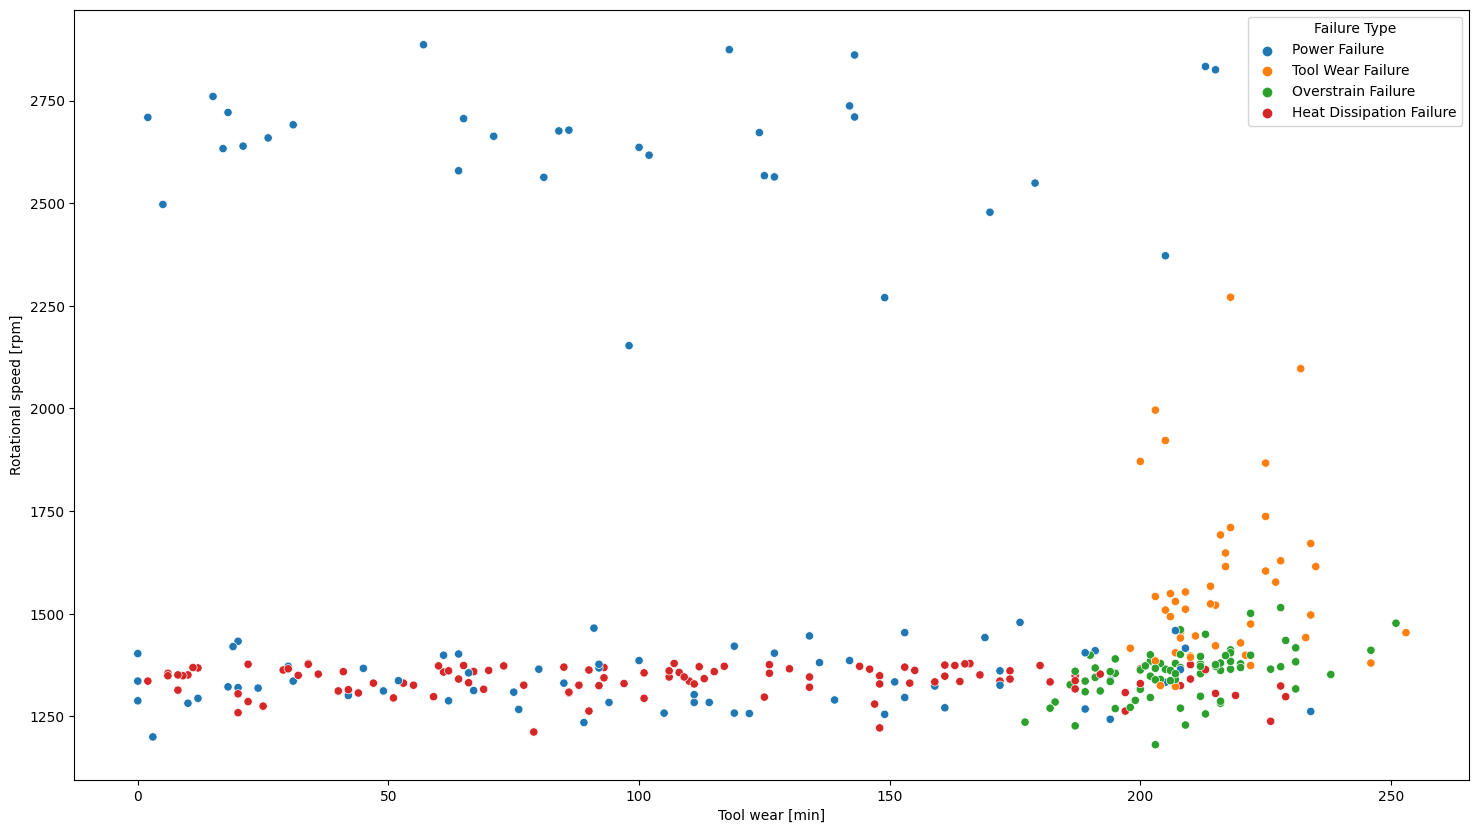

In [ ]:
plt.figure(figsize=(18,10))
sns.scatterplot(data=df_fail,x="Tool wear [min]",y='Rotational speed [rpm]',hue="Failure Type")

The plot of tool wear and torque is as follows

<Axes: xlabel='Tool wear [min]', ylabel='Torque [Nm]'>

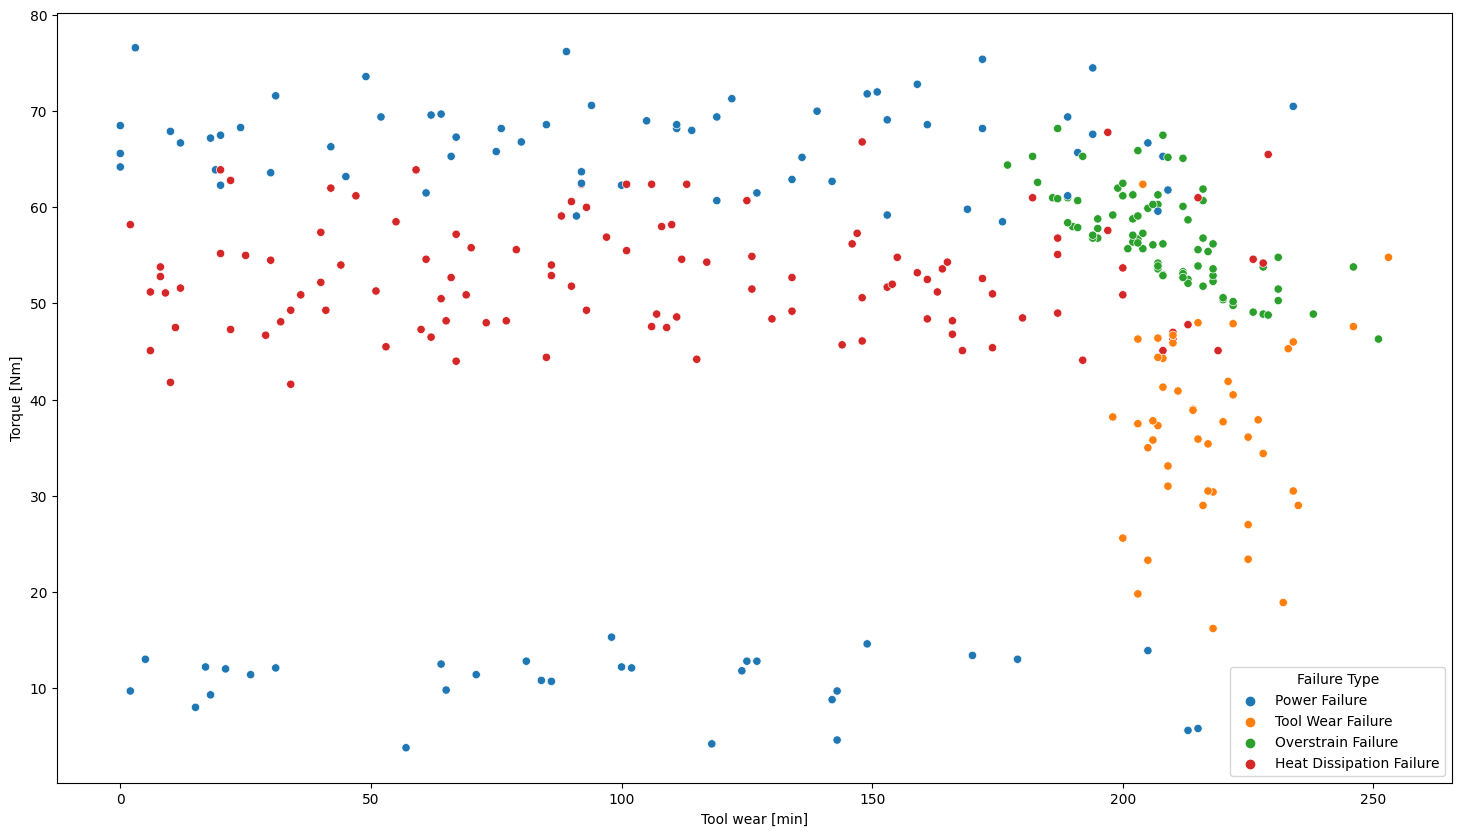

In [ ]:
plt.figure(figsize=(18,10))
sns.scatterplot(data=df_fail,x="Tool wear [min]",y='Torque [Nm]',hue="Failure Type")

The plor of temperature difference and rpm is as follows

<Axes: xlabel='td', ylabel='Rotational speed [rpm]'>

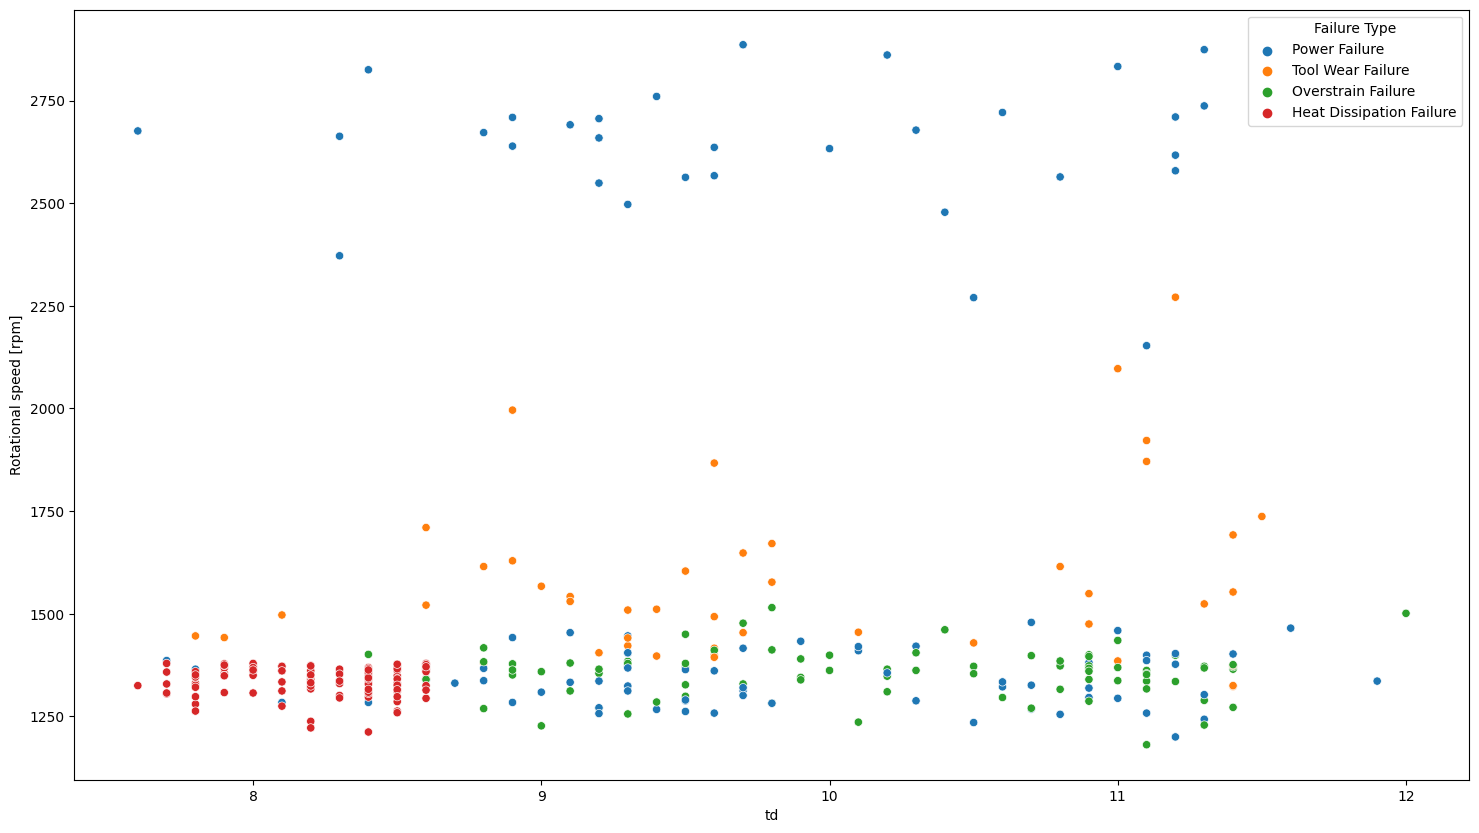

In [ ]:
plt.figure(figsize=(18,10))
sns.scatterplot(data=df_fail,x="td",y='Rotational speed [rpm]',hue="Failure Type")

The plot of torque wrt temperarture difference is as follows

<Axes: xlabel='td', ylabel='Torque [Nm]'>

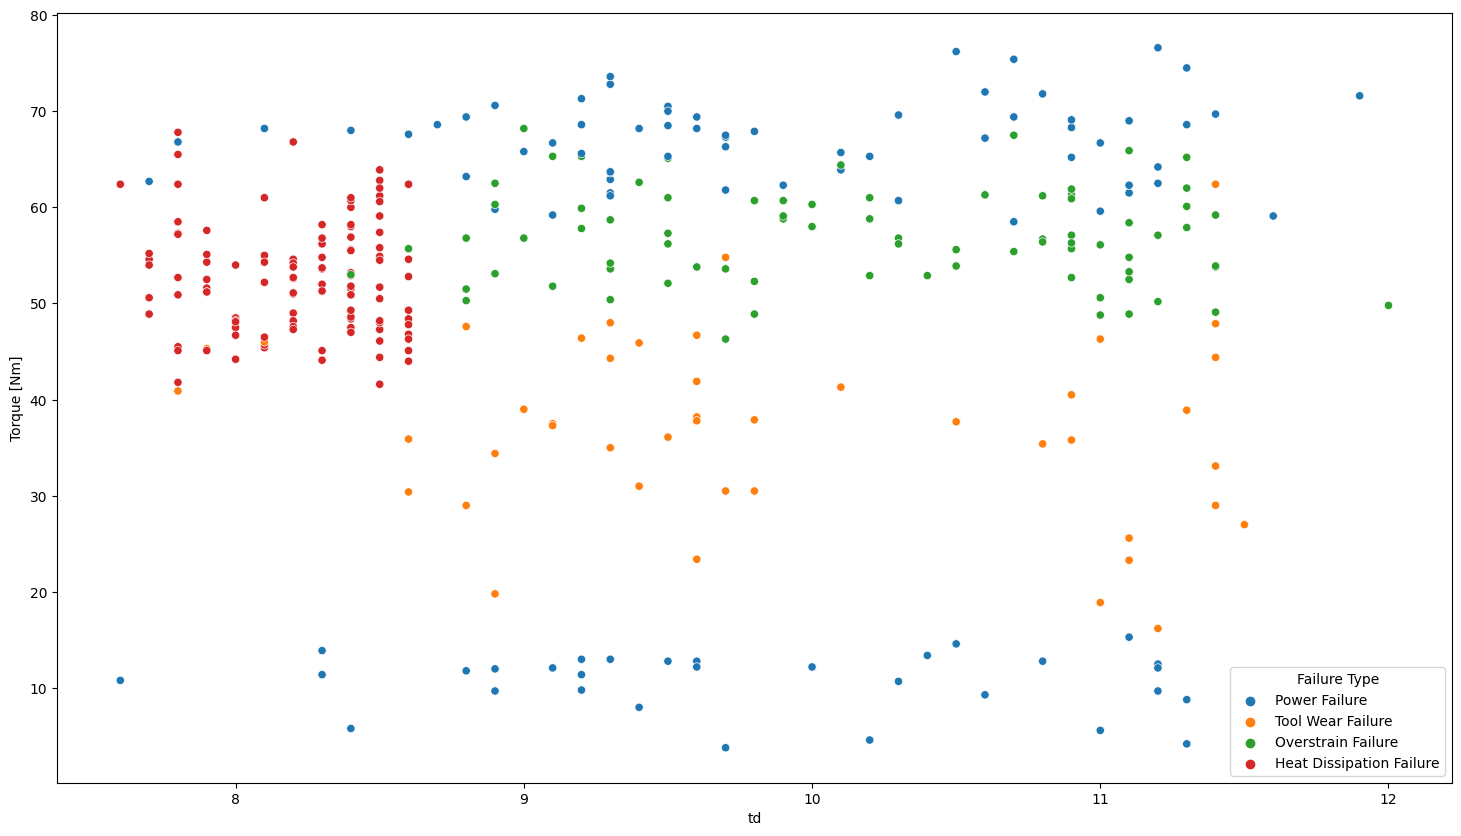

In [ ]:
plt.figure(figsize=(18,10))
sns.scatterplot(data=df_fail,x="td",y='Torque [Nm]',hue="Failure Type")

In [ ]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type', 'td',
       'Process_temp_normalized', 'Air_temp_normalized', 'Temp_diff'],
      dtype='object')

Summarizing the results of all the plots above
1. Heat dessipation failure occurs at lower RPM and higher torque when the temperature difference is less, meaning it occurs more frequently when the machine is starting
2.Tool wearing failure occurs mostly when the tool wear min is high, it is indipendent of rpm and torque
3. Over strain failure happnes at higher torque and lower RPM but unlike heat dessipation failure, they are indipendent of temperature difference but they need high tool wear min similar to tool wearing failure
4. Power failures either occur at high torque low rpm or high rpm low torque

In [ ]:
df_fail['rpm_norm']=(df_fail['Rotational speed [rpm]']-min(df_fail['Rotational speed [rpm]']))/(max(df_fail['Rotational speed [rpm]'])-min(df_fail['Rotational speed [rpm]']))

In [ ]:
df_fail['Torque_norm']=(df_fail['Torque [Nm]']-min(df_fail['Torque [Nm]']))/(max(df_fail['Torque [Nm]'])-min(df_fail['Torque [Nm]']))
df_fail['Tool_norm']=(df_fail['Tool wear [min]']-min(df_fail['Tool wear [min]']))/(max(df_fail['Tool wear [min]'])-min(df_fail['Tool wear [min]']))

In [ ]:
df_fail=df_fail.drop(columns=['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]','Product ID','UDI','Temp_diff','td','Target'])

Encoding the data

In [ ]:
df_fail = pd.get_dummies(data=df_fail, columns=['Type'],drop_first=True)

scaler = LabelEncoder()
df_fail['Failure Type'] = scaler.fit_transform(df_fail['Failure Type'])

Splitting train and target

In [ ]:
df_fail_targ=df_fail_train=df_fail.iloc[:,0]
df_fail_train=df_fail.iloc[:,1:]

In [ ]:
df_fail

,Failure Type,Process_temp_normalized,Air_temp_normalized,rpm_norm,Torque_norm,Tool_norm,Type_L,Type_M
50,2,0.194595,0.194595,0.985337,0.010989,0.565217,1,0
69,2,0.194595,0.194595,0.134311,0.850275,0.754941,1,0
77,3,0.189189,0.189189,0.160704,0.515110,0.822134,1,0
160,1,0.167568,0.167568,0.059238,0.781593,0.853755,1,0
161,1,0.162162,0.162162,0.135484,0.666209,0.861660,1,0
...,...,...,...,...,...,...,...,...
9758,3,0.178378,0.178378,0.639296,0.170330,0.861660,1,0
9764,2,0.172973,0.172973,0.066276,0.864011,0.047431,1,0
9822,1,0.172973,0.172973,0.104985,0.784341,0.739130,1,0
9830,1,0.162162,0.162162,0.091496,0.718407,0.814229,1,0


In [ ]:
df_fail_train

,Process_temp_normalized,Air_temp_normalized,rpm_norm,Torque_norm,Tool_norm,Type_L,Type_M
50,0.194595,0.194595,0.985337,0.010989,0.565217,1,0
69,0.194595,0.194595,0.134311,0.850275,0.754941,1,0
77,0.189189,0.189189,0.160704,0.515110,0.822134,1,0
160,0.167568,0.167568,0.059238,0.781593,0.853755,1,0
161,0.162162,0.162162,0.135484,0.666209,0.861660,1,0
...,...,...,...,...,...,...,...
9758,0.178378,0.178378,0.639296,0.170330,0.861660,1,0
9764,0.172973,0.172973,0.066276,0.864011,0.047431,1,0
9822,0.172973,0.172973,0.104985,0.784341,0.739130,1,0
9830,0.162162,0.162162,0.091496,0.718407,0.814229,1,0


In [ ]:
df_fail_targ

50      2
69      2
77      3
160     1
161     1
       ..
9758    3
9764    2
9822    1
9830    1
9974    2
Name: Failure Type, Length: 330, dtype: int64

Splitting the train and validation

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(df_fail_train,df_fail_targ,test_size=0.2,random_state=21)

In [ ]:
X_train

,Process_temp_normalized,Air_temp_normalized,rpm_norm,Torque_norm,Tool_norm,Type_L,Type_M
9018,0.108108,0.108108,0.254545,0.434066,0.857708,1,0
1682,0.140541,0.140541,0.248094,0.443681,0.889328,0,0
4840,0.437838,0.437838,0.068622,0.825549,0.233202,1,0
1789,0.156757,0.156757,0.077419,0.872253,0.264822,1,0
4355,0.362162,0.362162,0.058065,0.734890,0.581028,0,0
...,...,...,...,...,...,...,...
4157,0.362162,0.362162,0.048094,0.780220,0.355731,1,0
1808,0.151351,0.151351,0.812903,0.123626,0.494071,1,0
6497,0.297297,0.297297,0.076833,0.844780,0.758893,1,0
9084,0.102703,0.102703,0.085044,0.983516,0.679842,1,0


Training and predicting the results


In [ ]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

train_acc = round(svc.score(X_train, y_train) * 100, 1)
val_acc = round(accuracy_score(y_pred, y_test) * 100, 2)

print("Training Accuracy    :",train_acc ,"%")
print("Model Accuracy Score :",val_acc ,"%")

Training Accuracy    : 82.6 %
Model Accuracy Score : 83.33 %
